# Data Preparation

In [ ]:
import folium
import pandas as pd

In [2]:
country_geo = 'world-countries.json'

In [3]:
data = pd.read_csv('recovered.csv')
data.shape

(252, 116)

In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,345,397,421,458,468,472,502,558,558,610
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,531,543,570,595,605,620,627,650,654,682
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,493,499,514,521,526,537,545,550,550,568
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,11,11,11,13,13,13,13


In [5]:
data['mean'] = data.mean(axis=1)

In [6]:
sorted_df = data.sort_values(by='mean', ascending=False)
print(sorted_df)

                       Province/State  Country/Region      Lat      Long  \
53                              Hubei           China  30.9756  112.2707   
225                               NaN              US  37.0902  -95.7129   
112                               NaN         Germany  51.0000    9.0000   
199                               NaN           Spain  40.0000   -4.0000   
127                               NaN            Iran  32.0000   53.0000   
..                                ...             ...      ...       ...   
250                               NaN         Comoros -11.6455   43.3333   
235                          Anguilla  United Kingdom  18.2206  -63.0686   
238                               NaN      MS Zaandam   0.0000    0.0000   
245         Saint Pierre and Miquelon          France  46.8852  -56.3159   
242  Bonaire, Sint Eustatius and Saba     Netherlands  12.1784  -68.2385   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/4/20  \
53        28 

In [7]:
sorted_df.T.drop_duplicates().T

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,mean
53,Hubei,China,30.9756,112.271,28,28,31,32,42,45,...,63616,63616,63616,63616,63616,63616,63616,63616,63616,39933.7
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,187180,189791,189910,195036,198993,212534,216169,232733,230287,36315.1
112,NaN,Germany,51,9,0,0,0,0,0,0,...,132700,135100,139900,141700,141700,143300,144400,145617,147200,34366.2
199,NaN,Spain,40,-4,0,0,0,0,0,0,...,121343,123486,126002,128511,131148,133952,136166,137139,138980,32412.7
127,NaN,Iran,32,53,0,0,0,0,0,0,...,79379,80475,81587,82744,83837,85064,86143,87422,88357,22740.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,NaN,Comoros,-11.6455,43.3333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.277963
235,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,0.150456
238,NaN,MS Zaandam,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Saint Pierre and Miquelon,France,46.8852,-56.3159,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,-0.0651816


In [8]:
import matplotlib.pyplot as plt
data_to_plot = sorted_df[['Country/Region','Lat','Long','mean']]
data_to_plot = data_to_plot.head(100)
loc = sorted_df[['Lat','Long']]
data_to_plot.rename(columns = {'Country/Region':'Region'}, inplace = True) 
data_to_plot.plot(kind ='hist')

In [9]:
loc.head(10)

,Lat,Long
53,30.9756,112.2707
225,37.0902,-95.7129
112,51.0000,9.0000
199,40.0000,-4.0000
127,32.0000,53.0000
131,43.0000,12.0000
108,46.2276,2.2137
213,38.9637,35.2433
29,-14.2350,-51.9253
204,46.8182,8.2275


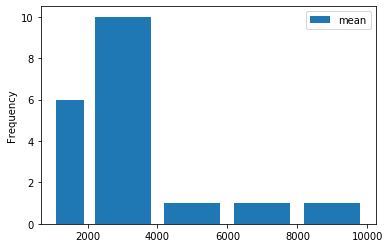

In [10]:
data_to_plot[['mean']].plot(kind='hist',bins=[1000,2000,4000,6000,8000,10000], rwidth=0.8, legend = 'true')
plt.show()

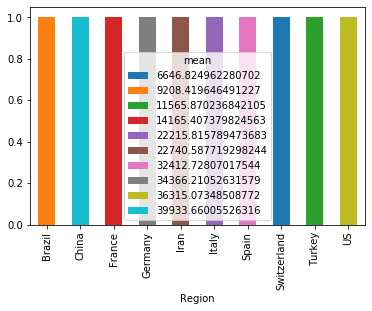

In [15]:
data_to_plot1= data_to_plot.head(10)

data_to_plot1.groupby(['Region','mean']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

# Visualising the Map


In [16]:
map = folium.Map(location=[100, 0], zoom_start=1.5)
country_geo = 'world-countries.json'

In [18]:
map.choropleth(geo_data= country_geo , data=data_to_plot1,
             columns=['Lat','Long'],
             key_on='mean',
             fill_color='RdBu', fill_opacity=0.7, line_opacity=0.2)

In [19]:
map.save('plot_data.html')

In [20]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

C:\Users\babby\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Clustering Neighbourhood & Visualization

In [21]:
import folium
from folium.plugins import MarkerCluster

coord = [10, 0]

map1 = folium.Map(location=coord, zoom_start=12)
marker_cluster = MarkerCluster().add_to(map1) 

for each in loc[0:100].iterrows():
   folium.CircleMarker(location = [each[1]['Lat'],each[1]['Long']], 
    clustered_marker = True, tiles='Covid 19').add_to(map1)

In [22]:
map1.save('map.html')

In [23]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src= map.html width=1000 height=750></iframe>')

In [24]:
group = data_to_plot.groupby("Region")
group.head(25)

,Region,Lat,Long,mean
53,China,30.9756,112.2707,39933.660055
225,US,37.0902,-95.7129,36315.073485
112,Germany,51.0000,9.0000,34366.210526
199,Spain,40.0000,-4.0000,32412.728070
127,Iran,32.0000,53.0000,22740.587719
...,...,...,...,...
77,Cote d'Ivoire,7.5400,-5.5471,132.052569
195,Slovakia,48.6690,19.6990,130.968140
32,Burkina Faso,12.2383,-1.5616,128.926989
71,China,24.9740,101.4870,128.030360


In [40]:
country = group['Region','mean']
new = country.head(25)

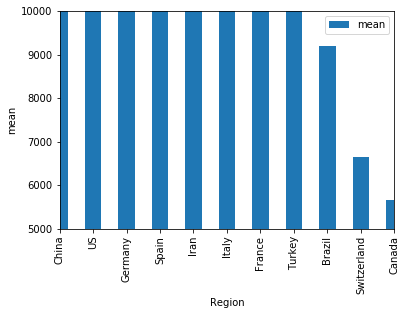

In [43]:
new.plot('Region','mean', kind='bar')
plt.ylim(5000,10000)
plt.xlim(0,10)
plt.xlabel("Region") 
plt.ylabel("mean") 
plt.show()

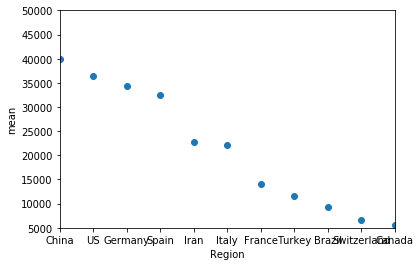

In [62]:
plt.scatter(new['Region'],new['mean']) 
plt.ylim(5000,50000)
plt.xlim(0,10)
plt.xlabel("Region") 
plt.ylabel("mean") 
plt.show() 